# Data, Machines and the 🐍 
<img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/lessons/dmap/projects/hp411/html/section00.png" align="left"/>

<a id="install"></a>
## Notebook Preparation for Lesson 1•2•3
Each lesson will start with a similar template (given in the course schedule):  
1. **save** to your google drive (copy to drive)<br/><img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/assets/images/colab/copy-to-drive.png"/>
2. **update** the NET_ID to be your netID (no need to include @illinois.edu)
3. **run** the next cell to install the IDE. <img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/assets/images/colab/play-button.png"/>

In [ ]:
LESSON_ID = 'dmap:projects:hp411'   # keep this as is
NET_ID    = 'jacanty2' # CHANGE_ME to your netID (keep the quotes)

def install_ide(net_id, lesson_id):
  import sys
  if 'codestories' not in sys.modules:
      print('installing modules')
      !pip install git+https://mehaberman@bitbucket.org/mehaberman/codestories.git --upgrade &> install.log
  
  from codestories.cs.CodeStories import CodeStory
  return CodeStory(net_id, lesson_id)

ide = install_ide(NET_ID, LESSON_ID)
print(ide.welcome())

installing modules
Telling the story: Finding Mr. Potter


# Lesson Finding Mr. Potter
(hit ▶ to read the first part of the lesson️)

In [ ]:
# run to read the next section
ide.reader.view_section(1)

# The HP Corpus

In [ ]:
# run to read the next section
ide.reader.view_section(2)

In [ ]:
import LessonUtil as Util

def get_harry_potter(text):
   return Util.read_data_file(text)
#modified this function for personal use
print(get_harry_potter("hp3.txt")[0:17])

owl post harry po


In [ ]:
# run to read the next section
ide.reader.view_section(4)


In [ ]:
# type&run the above example/exercise in this cell
def build_corpus(count=1):

  final_list = []
  hp_list = ["hp1.txt", "hp2.txt","hp3.txt","hp4.txt","hp5.txt","hp6.txt","hp7.txt"]
  if count == 1:
    final_list.append(get_harry_potter(hp_list[0]))
  elif count == 2:
    final_list.append(get_harry_potter(hp_list[0]))
    final_list.append(get_harry_potter(hp_list[1]))
  elif count == 3:
    final_list.append(get_harry_potter(hp_list[0]))
    final_list.append(get_harry_potter(hp_list[1]))
    final_list.append(get_harry_potter(hp_list[2]))
  elif count == 4:
    final_list.append(get_harry_potter(hp_list[0]))
    final_list.append(get_harry_potter(hp_list[1]))
    final_list.append(get_harry_potter(hp_list[2]))
    final_list.append(get_harry_potter(hp_list[3]))
  elif count == 5:
    final_list.append(get_harry_potter(hp_list[0]))
    final_list.append(get_harry_potter(hp_list[1]))
    final_list.append(get_harry_potter(hp_list[2]))
    final_list.append(get_harry_potter(hp_list[3]))
    final_list.append(get_harry_potter(hp_list[4]))
  elif count == 6:
    final_list.append(get_harry_potter(hp_list[0]))
    final_list.append(get_harry_potter(hp_list[1]))
    final_list.append(get_harry_potter(hp_list[2]))
    final_list.append(get_harry_potter(hp_list[3]))
    final_list.append(get_harry_potter(hp_list[4]))
    final_list.append(get_harry_potter(hp_list[5]))
  elif count == 7:
    final_list.append(get_harry_potter(hp_list[0]))
    final_list.append(get_harry_potter(hp_list[1]))
    final_list.append(get_harry_potter(hp_list[2]))
    final_list.append(get_harry_potter(hp_list[3]))
    final_list.append(get_harry_potter(hp_list[4]))
    final_list.append(get_harry_potter(hp_list[5]))
    final_list.append(get_harry_potter(hp_list[6]))

  return final_list
    
    
build_corpus(2)


def test_corpus():
  c = build_corpus(2)
  print(len(c) == 2)
  print(c[0][0:17])
  print(c[1][0:31])
  doc1 = c[0]
  print(len(doc1.split()), len(set(doc1.split())))

test_corpus()
print(ide.tester.test_function(build_corpus))


True
the boy who lived
harry potter the worst birthday
75258 6083
Tested: build_corpus
Score: 20
Max Score: 20
Output: Passed: Nice work



In [ ]:
# run to read the next section
ide.reader.view_section(6)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
 
from sklearn.feature_extraction.text import TfidfVectorizer
def build_tf_idf_model(docs, stopwords=[]):
  vec = TfidfVectorizer(use_idf=True,smooth_idf = True, sublinear_tf=True, norm=None,
                        stop_words= stopwords)
  matrix = vec.fit_transform(docs)
  


   # build the model & matrix 

   # return the vectorizer, matrix
  return vec,matrix


def test_build(corpus):
  vec, matrix = build_tf_idf_model(corpus)
test_build(build_corpus(1))


In [ ]:
# run to read the next section
ide.reader.view_section(8)

In [ ]:
import pandas as pd
def print_tfidf(vec,matrix, n=0):
    features = vec.get_feature_names() # the unique words 
    doc_vector = matrix[n]
    df = pd.DataFrame(doc_vector.T.todense(), index=features, columns=["tfidf"])
    df.sort_values(by=["tfidf"], ascending=False, inplace=True)
    print(df.head(10))

def test_print():
    corpus = [get_harry_potter("hp1.txt")]
    vec, matrix = build_tf_idf_model(corpus, Util.load_stopwords(extra=['said']) )
    print_tfidf(vec,matrix)

test_print()

             tfidf
harry     8.189168
ron       7.061457
hagrid    6.913503
hermione  6.594711
back      6.564520
one       6.545177
know      6.365976
got       6.293305
didn      6.293305
get       6.273000


In [ ]:
# run to read the next section
ide.reader.view_section(10)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
def prepare_query_v1(corpus = None, query = ''):
  if corpus is None:
    corpus = build_corpus(3)
    vec, matrix = build_tf_idf_model(build_corpus(count=3))
    a = vec.transform(query)

  return a




def dump_sparse_vector(v):
  coo_m = v.tocoo()
  for r,c,d in zip(coo_m.row,coo_m.col, coo_m.data):
    print('non zero at',r,c,d)

def test_single_query(query):
  q_vec = prepare_query_v1(query=query)
  dump_sparse_vector(q_vec)

test_single_query(['harry potter'])

non zero at 0 6938 1.0
non zero at 0 4308 1.0


In [ ]:
# run to read the next section
ide.reader.view_section(12)

# Measuring Similarity

In [ ]:
# run to read the next section
ide.reader.view_section(13)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.spatial.distance import cdist

def print_matching_document(matrix, q_vector):
  assert q_vector.shape[0] == 1, "bad query vector (wrong size)"
  for m_idx, m in enumerate(matrix):
    for q_idx, q in enumerate(q_vector):
      print(cosine_similarity(m,q))
      


q_vector = prepare_query_v1(query=['harry potter pretend'])
print(q_vector);print('\n')
print(type(q_vector))




def find_matching_document(matrix, q_vector, debug = True):
   # RETURNING M AND A, INDEX OF MATRIX ROW AND COSINE SIMIALARITTY 
   sparse_matrices = []  
   # return a tuple of
   # the index of the matrix (row) which is most similar to q_vector (max value)
   assert q_vector.shape[0] == 1, "bad query vector (wrong size)"
   for m_idx, m in enumerate(matrix):
     for q_idx, q in enumerate(q_vector):
       a = cosine_similarity(m,q) #sparse matrices 
       sparse_matrices.append(a)


   max = sparse_matrices[0]
   for matrix in sparse_matrices:
     if matrix > max:
       max = matrix
      
       



       

   if debug == True:
     print(sparse_matrices.index(max), max,)
   return sparse_matrices.index(max) , max 


   # the cosine distance 
  
def find_match(query, corpus_size=3):
  corpus = build_corpus(corpus_size)
  vec, matrix = build_tf_idf_model(corpus)
  b = vec.transform([query])
  
  #
  # build q_vector here
  q_vector = prepare_query_v1(query = [query])
  #
  
  return find_matching_document(matrix, q_vector,debug = True)


print(find_match(query="harry potter pretend", corpus_size=3))
print(find_match(query="muggle",corpus_size=3))
print(ide.tester.test_function('find_matching_document'))

  (0, 7013)	1.0
  (0, 6938)	1.0
  (0, 4308)	1.0


<class 'scipy.sparse.csr.csr_matrix'>
0 [[0.0467311]]
(0, array([[0.0467311]]))
1 [[0.02305858]]
(1, array([[0.02305858]]))
Tested: find_matching_document
Score: 20
Max Score: 20
Output: Passed:



In [ ]:
# run to read the next section
ide.reader.view_section(15)

# A Quick Review

In [ ]:
# run to read the next section
ide.reader.view_section(16)

# The User Interface (UI)

In [ ]:
# run to read the next section
ide.reader.view_section(17)

1 [[0.02250968]]
1


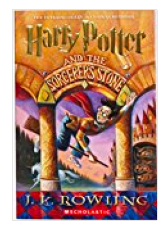

In [ ]:
import matplotlib.pyplot as plt
import LessonUtil as Util

def show_image(path):
  with open(path, 'rb') as fd:
    fig, ax = plt.subplots()
    ax.set_axis_off()
    imgdata = plt.imread(fd)
    im = ax.imshow(imgdata)
    return fig

def test_UI(vec=None, matrix=None, query='', debug=False):
  
  # build vec, matrix if either parameter is None
  if (matrix is None):
    vec, matrix = build_tf_idf_model(build_corpus(count=7))
  # use the full harry potter corpus if you need to build 
  
  #
  # transform the query string
  #
  a = vec.transform([query])
  
  

  
  #
  # find the matching document
  #
  b = find_matching_document(matrix,a, debug = debug)
  if b == 0:
    find
  
  #
  # if no document matches, use the first document
  
  #


  #
  # get path for the image 
  #
  path = Util.path_for_data('hp1.png')


  # display the image (uncomment when ready)
  show_image(path)  
  
  # return the winning index
  return b[0]



print(test_UI(query='muggle',debug=True))

In [ ]:
# run to read the next section
ide.reader.view_section(19)

3

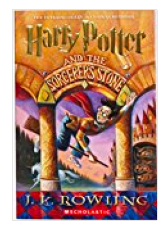

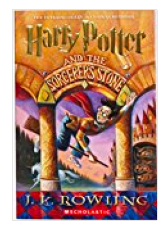

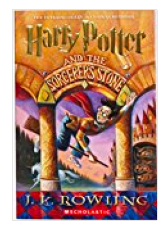

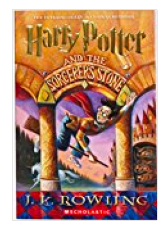

In [ ]:
corpus = build_corpus(7)
vec, matrix = build_tf_idf_model(corpus)

# now I can reuse vec & matrix 
test_UI(vec, matrix, "muggle")          # chamber of secrets
test_UI(vec, matrix, "winky")           # goblet of fire
test_UI(vec, matrix, "lupin")           # prisoner of azkaban
test_UI(vec, matrix, "lupin champions") # goblet of fire

In [ ]:
# run to read the next section
ide.reader.view_section(21)

0 [[0.04641815]]


0

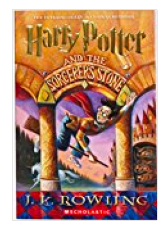

In [ ]:
input = "muggle and muggles" #@param {type:"string"}
test_UI(vec, matrix, input, debug=True)

In [ ]:
# run to read the next section
ide.reader.view_section(23)

# Rock Cakes for Thought and Talk

In [ ]:
# run to read the next section
ide.reader.view_section(24)

# Extra Credit Fun

In [ ]:
# run to read the next section
ide.reader.view_section(25)

In [ ]:
# ide.tester.test_functionality('extra_credit')

# Test and Submit

In [ ]:
# run to read the next section
ide.reader.view_section(27)

In [ ]:
# print(ide.tester.test_notebook()) 
print(ide.tester.test_notebook(verbose=True)) 

# once you are ready -- run this 
ide.tester.download_solution()

Score 100/100

build_corpus 20/20
Nice work
build_tf_idf_model 20/20
Nice work
test_print 10/10

find_matching_document 20/20

find_match 10/10

extra_credit 0/10
extra credit not found
hp411 20/20

hp411.py contains valid python; it will be downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>